In [98]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [99]:
X_blob, y_blob = make_blobs(n_samples=5000,n_features=5,centers=3,cluster_std=5,random_state=69)
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.float)

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(X_blob,y_blob,test_size=0.25,random_state=69)

In [101]:
type(X_train),Y_train.shape,X_test.shape,Y_test.shape

(torch.Tensor, torch.Size([3750]), torch.Size([1250, 5]), torch.Size([1250]))

In [102]:
Y_train[:10]

tensor([0., 0., 1., 0., 2., 1., 1., 1., 0., 1.])

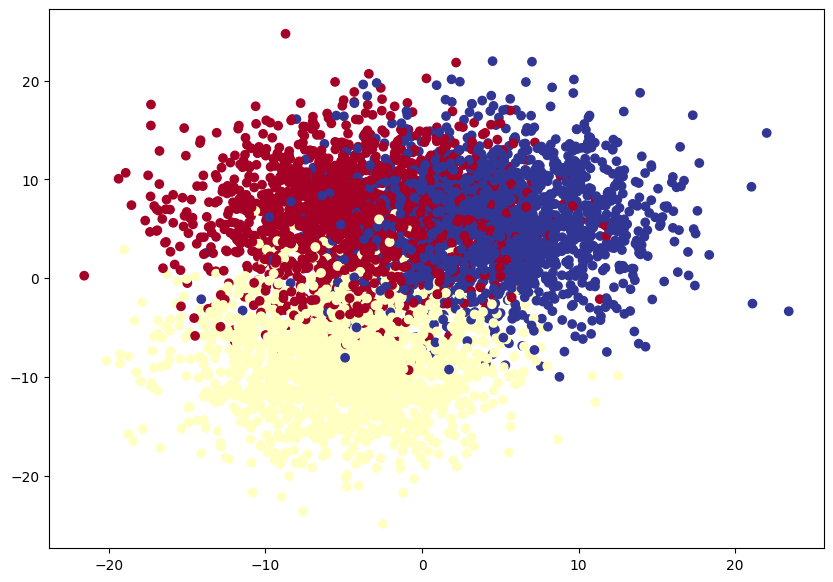

In [103]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [104]:
from torch import nn
class BlobModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Linear(in_features=5,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=3))
  def forward(self,x):
    return self.layers(x)
model=BlobModel()

In [105]:
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 2.7312e-01, -2.6919e-01,  4.2562e-01, -3.5525e-01, -1.3644e-01],
                      [-3.0819e-01,  3.4490e-01,  1.6777e-01, -2.2305e-01, -3.4588e-01],
                      [-2.5894e-01, -8.6275e-02, -2.2827e-01,  3.2589e-01, -1.8816e-01],
                      [-2.9257e-01, -1.3796e-01, -4.3672e-01, -2.1719e-01, -2.4398e-01],
                      [ 9.6255e-02,  3.6371e-01,  4.8297e-02, -2.6064e-01,  1.8411e-01],
                      [-1.9040e-01, -2.1168e-01, -8.5705e-02, -2.3338e-01,  4.9161e-02],
                      [ 3.6304e-01,  6.1000e-02,  2.7011e-01, -3.8851e-01, -3.5182e-01],
                      [-5.9502e-02,  4.0970e-04,  2.7914e-01, -3.9332e-01,  1.8659e-01],
                      [-3.8385e-01,  7.2140e-02,  2.9555e-01,  6.1690e-02,  1.4279e-01],
                      [ 2.8433e-01,  4.4243e-01, -2.8065e-01,  1.4651e-01,  3.6819e-01]])),
             ('layers.0.bias',
              tensor([ 0.2543, -0.4051, -0.

In [106]:
lossf=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [107]:
from sklearn import metrics
torch.manual_seed(420)
epochs=1000
for epoch in range(epochs):
  model.train()
  y_logit=model(X_train)
  y_preds=torch.argmax(torch.softmax(y_logit,dim=1),dim=1)

  loss=lossf(y_logit,Y_train.type(torch.long))

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logit=model(X_test)
    test_preds=torch.argmax(torch.softmax(test_logit,dim=1),dim=1)

    test_loss=lossf(test_logit,Y_test.type(torch.long))

    acc=metrics.accuracy_score(Y_train,y_preds)
    test_acc=metrics.accuracy_score(Y_test,test_preds)

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.35509, Acc: 0.34% | Test Loss: 0.79352, Test Acc: 0.63%
Epoch: 100 | Loss: 0.27490, Acc: 0.89% | Test Loss: 0.24888, Test Acc: 0.90%
Epoch: 200 | Loss: 0.26956, Acc: 0.89% | Test Loss: 0.24577, Test Acc: 0.91%
Epoch: 300 | Loss: 0.26642, Acc: 0.90% | Test Loss: 0.24462, Test Acc: 0.90%
Epoch: 400 | Loss: 0.26431, Acc: 0.90% | Test Loss: 0.24448, Test Acc: 0.90%
Epoch: 500 | Loss: 0.26286, Acc: 0.90% | Test Loss: 0.24379, Test Acc: 0.90%
Epoch: 600 | Loss: 0.26148, Acc: 0.90% | Test Loss: 0.24318, Test Acc: 0.91%
Epoch: 700 | Loss: 0.25970, Acc: 0.90% | Test Loss: 0.24270, Test Acc: 0.91%
Epoch: 800 | Loss: 0.25876, Acc: 0.90% | Test Loss: 0.24219, Test Acc: 0.91%
Epoch: 900 | Loss: 0.25812, Acc: 0.90% | Test Loss: 0.24187, Test Acc: 0.91%


In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(Y_train, y_preds))

print("\nClassification Report (Precision, Recall, F1-Score):")
print(classification_report(Y_train, y_preds))

print("Accuracy Score:")
print(accuracy_score(Y_train, y_preds))


Confusion Matrix:
[[1070   83   88]
 [  71 1151   35]
 [  69   41 1142]]

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1241
         1.0       0.90      0.92      0.91      1257
         2.0       0.90      0.91      0.91      1252

    accuracy                           0.90      3750
   macro avg       0.90      0.90      0.90      3750
weighted avg       0.90      0.90      0.90      3750

Accuracy Score:
0.8968


In [112]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="basic_multiclass_classification_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)
print("Model saved")

Model saved
